# 1. Libraries

In [4]:
# Data manipulation

import pandas as pd
import numpy as np

# DataViz

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # Separabilidade dos dados
import scikitplot as skplt # Cumulative gains / Lift
from sklearn.metrics import precision_recall_curve # Gráfico de recall e precisão

# Data splitting

from sklearn.model_selection import train_test_split

# Pipeline / transformation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Metrics

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve

# Class balancing

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Modeling

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Feature selection

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Hyperparameter optimization

from sklearn.model_selection import RandomizedSearchCV

# Neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Import the data

In [5]:
df_raw = pd.read_csv('data/Churn_Modelling.csv')

# 3. Initial inspection

In [6]:
df_raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Checking the dimensionality

print(f'Total de linhas: {df_raw.shape[0]}')
print(f'Total de colunas: {df_raw.shape[1]}')

Total de linhas: 10000
Total de colunas: 14


In [8]:
# General data information

df_raw. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# Checking the data distribution

np.round(df_raw.describe(),1)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.5,15690940.6,650.5,38.9,5.0,76485.9,1.5,0.7,0.5,100090.2,0.2
std,2886.9,71936.2,96.7,10.5,2.9,62397.4,0.6,0.5,0.5,57510.5,0.4
min,1.0,15565701.0,350.0,18.0,0.0,0.0,1.0,0.0,0.0,11.6,0.0
25%,2500.8,15628528.2,584.0,32.0,3.0,0.0,1.0,0.0,0.0,51002.1,0.0
50%,5000.5,15690738.0,652.0,37.0,5.0,97198.5,1.0,1.0,1.0,100193.9,0.0
75%,7500.2,15753233.8,718.0,44.0,7.0,127644.2,2.0,1.0,1.0,149388.2,0.0
max,10000.0,15815690.0,850.0,92.0,10.0,250898.1,4.0,1.0,1.0,199992.5,1.0


# 2. Duplicate Value

In [10]:
# Checking for duplicate data

df_raw.duplicated().sum()

0

In [11]:
# Checking null values

df_raw.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 4. Dataset Split

In [12]:
# Dataset copy

df1 = df_raw.copy()

In [13]:
# Splitting features and targets

X = df1.drop('Exited', axis=1)
y = df1['Exited']

In [14]:
# Splitting train and test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, stratify=y_train_val, random_state=42)

In [15]:
# Dimensionality

print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de validação:{X_val.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 8100
Dados de validação:900
Dados de teste: 1000


# 5. EDA

<function matplotlib.pyplot.show(close=None, block=None)>

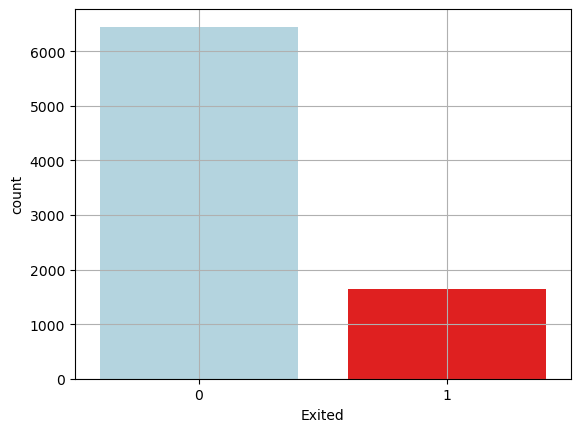

In [16]:
# Checking for class imbalance

sns.countplot(data=X_train.join(y_train), x='Exited', palette=['lightblue', 'red'])
plt.grid()
plt.show

In [17]:
# Checking the class percentages

y_train.value_counts(normalize=True)

0    0.796296
1    0.203704
Name: Exited, dtype: float64

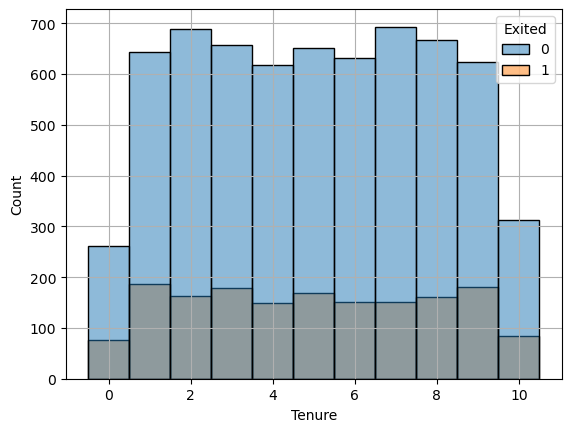

In [18]:
# Checking churn

data = pd.concat([X_train, y_train], axis=1)

sns.histplot(data=data, x='Tenure', hue='Exited', discrete=True)
plt.grid()

In [19]:
# Separating columns with numerical data
colunas_numericas = X_train.join(
    y_train).select_dtypes(include=['int64', 'float64'])

# Separating columns with categorical data
colunas_categoricas = X_train.join(y_train).select_dtypes(
    exclude=['int64', 'float64'])

### 5.1 Numerical Data

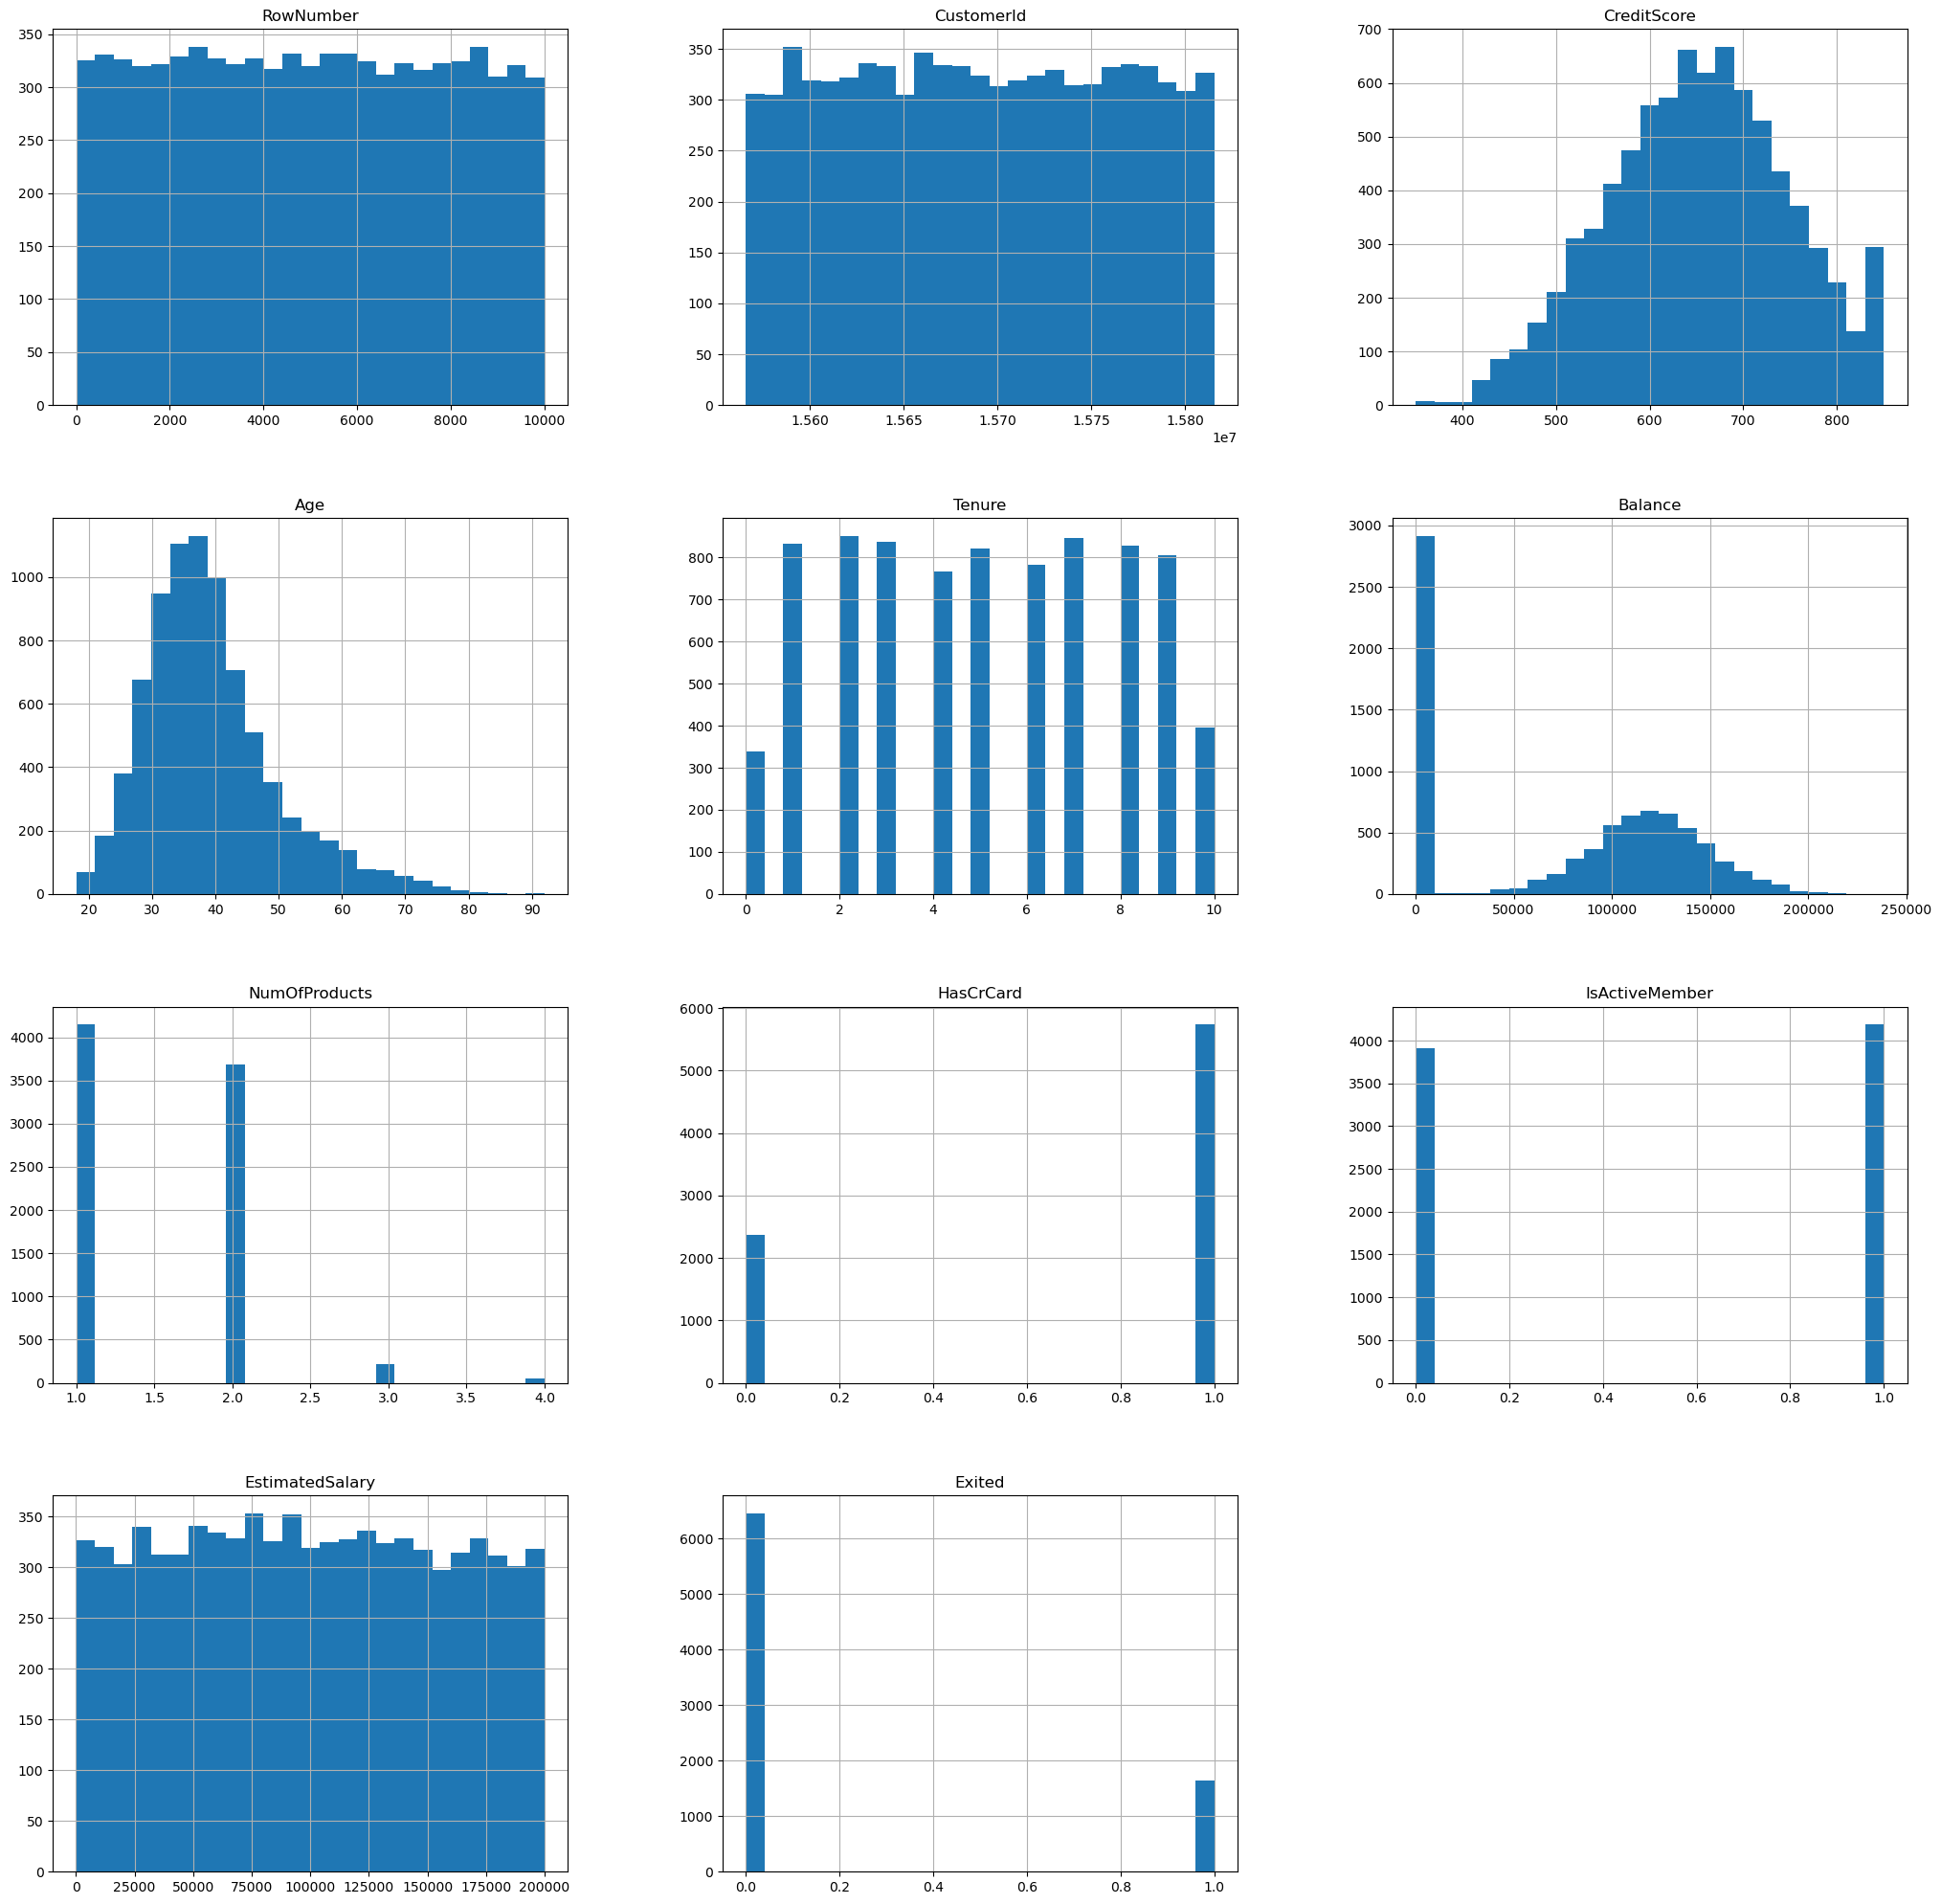

In [20]:
# Checking the distributions of numerical variables

colunas_numericas.hist(figsize=(25, 25), bins=25);

In [21]:
# Checking the number of active customers

df_raw['IsActiveMember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [22]:
# Counting customers with and without credit cards

df_raw['HasCrCard'].value_counts(normalize=True)

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [23]:
# Counting the number of customers by service offered

df_raw['NumOfProducts'].value_counts(normalize=True)

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: NumOfProducts, dtype: float64

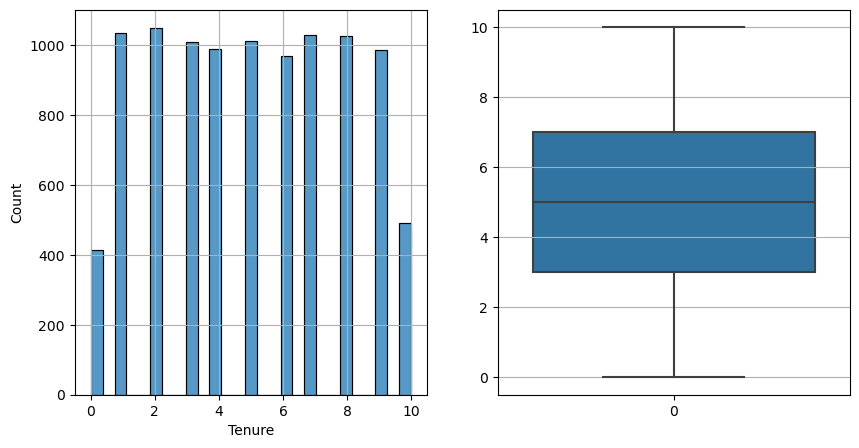

In [24]:
# Tenure

plt.figure(figsize=(10, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df_raw['Tenure'])
plt.grid()

# Boxplot
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(data=df_raw['Tenure'])

plt.show()

In [25]:
# Counting the number of new customers

(df_raw['Tenure'] == 0).sum()

413

In [26]:
# Percentage of customers per month who remained active

df_raw['Tenure'].value_counts(normalize=True)

2     0.1048
1     0.1035
7     0.1028
8     0.1025
5     0.1012
3     0.1009
4     0.0989
9     0.0984
6     0.0967
10    0.0490
0     0.0413
Name: Tenure, dtype: float64

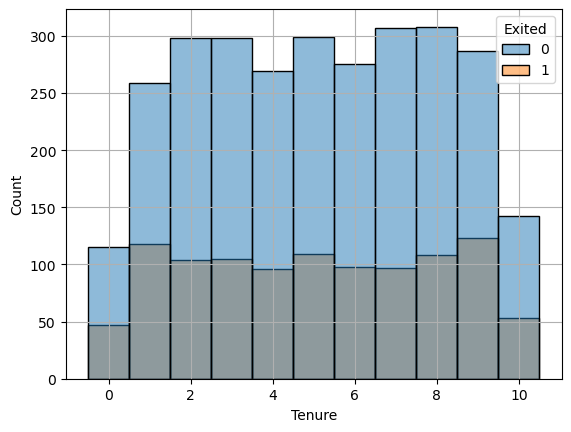

In [27]:
# Checking actives and churn

sns.histplot(data=X_train.join(y_train)[X_train['IsActiveMember'] == 0], x='Tenure', hue='Exited', discrete=True)
plt.grid()

<function matplotlib.pyplot.show(close=None, block=None)>

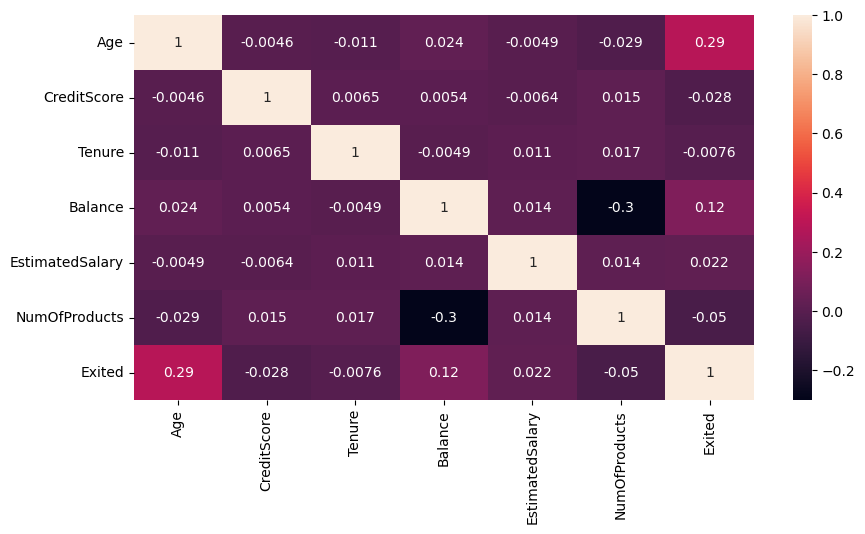

In [28]:
# Pearson linear correlation

plt.figure(figsize=(10, 5))

cols = colunas_numericas[['Age', 'CreditScore', 'Tenure',
                          'Balance', 'EstimatedSalary', 'NumOfProducts']].join(y_train)

sns.heatmap(cols.corr(method='pearson'), annot=True)
plt.show

### 5.2 Categorical Data

In [29]:
# Unique values of categorical data

colunas_categoricas.apply(lambda x: x.unique().shape[0])

Surname      2642
Geography       3
Gender          2
dtype: int64

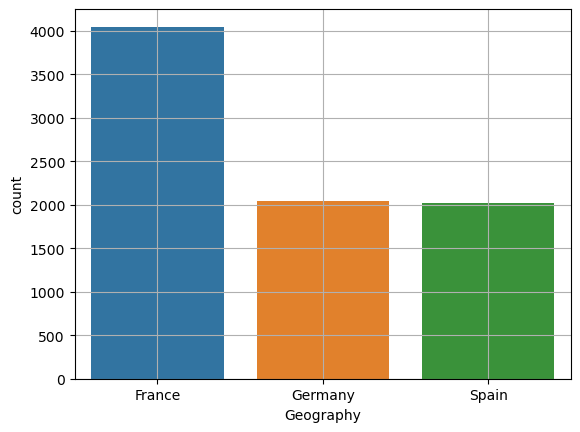

In [30]:
# Checking the number of customers in each country

sns.countplot(data=X_train.join(y_train), x='Geography')
plt.grid()
plt.show()

In [31]:
# Checking the number of customers per registered country

df_raw['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

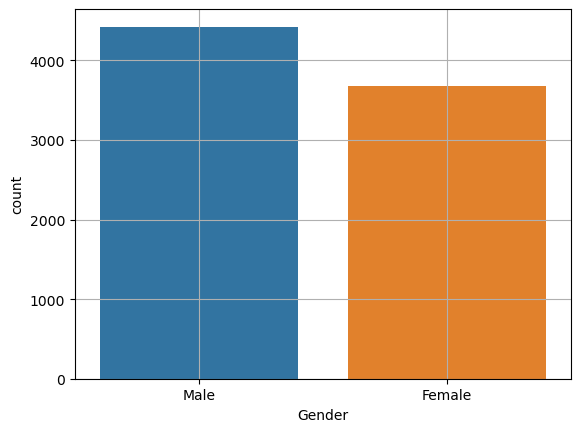

In [32]:
# Quantity of individuals by gender

sns.countplot(data=X_train.join(y_train), x='Gender')
plt.grid()
plt.show()

In [33]:
# Counting customers by gender

df_raw['Gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

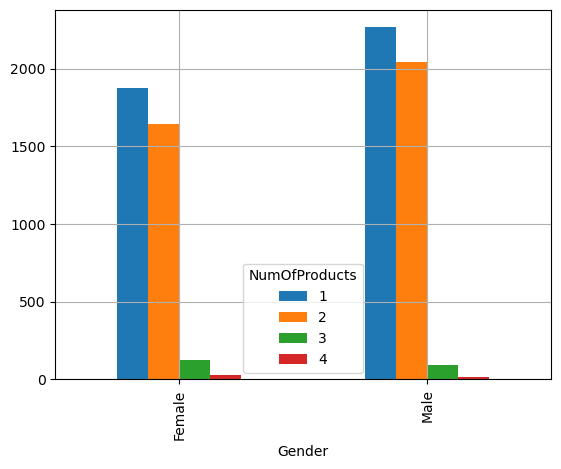

In [34]:
# Consumption of service types offered by gender

X_train.join(y_train).groupby(['Gender', 'NumOfProducts']).size().unstack().plot(kind='bar')
plt.grid()

There is no difference in purchasing behavior between genders for the different services.

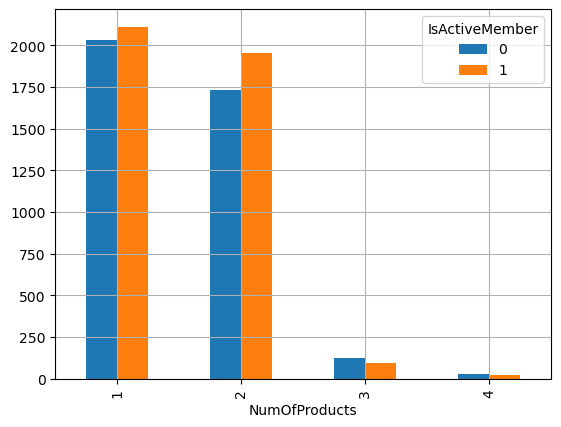

In [35]:
# Active customers and services offered

X_train.join(y_train).groupby(['NumOfProducts', 'IsActiveMember']).size().unstack().plot(kind='bar')
plt.grid()

Until the purchase of 2 products, active members have a slightly higher purchase rate compared to inactive customers. However, when it comes to purchasing 3 products, active members show a decrease in their purchases.

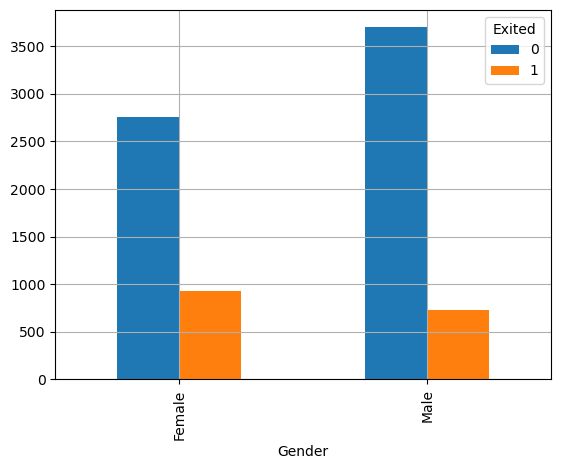

In [36]:
# Churn by gender

X_train.join(y_train).groupby(['Gender', 'Exited']).size().unstack().plot(kind='bar')
plt.grid()

In [37]:
churn_gender = X_train.join(y_train).groupby(['Gender', 'Exited']).size().unstack()
churn_gender

Exited,0,1
Gender,,
Female,2753,924
Male,3697,726


In [38]:
# Gender proportion by churn

churn_gender.iloc[:, 1] / churn_gender.sum(axis=1)

Gender
Female    0.251292
Male      0.164142
dtype: float64

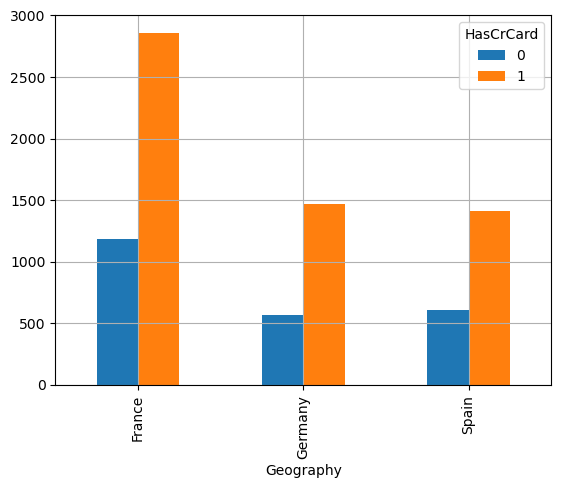

In [39]:
# Credit card usage by country

X_train.join(y_train).groupby(['Geography', 'HasCrCard']).size().unstack().plot(kind='bar')
plt.grid()

In [40]:
# Proportion of customers from different countries with a credit card

h5 = X_train.join(y_train).groupby(['Geography', 'HasCrCard']).size().unstack()
h5.iloc[:, 1] / h5.sum(axis=1)

Geography
France     0.706377
Germany    0.719961
Spain      0.700248
dtype: float64

The proportion is practically the same.

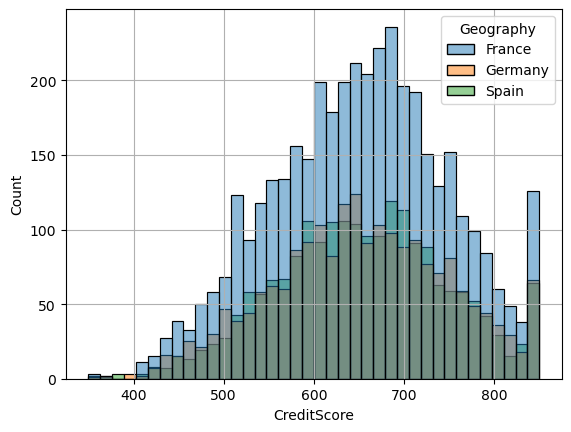

In [41]:
# Credit scores of customers from different countries

sns.histplot(X_train.join(y_train), x='CreditScore', hue='Geography')
plt.grid()

In [42]:
X_train[['CreditScore', 'Geography']].groupby('Geography').describe().reset_index()

Geography CreditScore                                                     \
                  count        mean        std    min    25%    50%    75%   
0    France      4046.0  650.727138  97.023465  350.0  583.0  654.0  718.0   
1   Germany      2039.0  651.898970  97.907702  350.0  585.0  651.0  723.0   
2     Spain      2015.0  652.482878  94.167035  358.0  588.0  653.0  717.0   

          
     max  
0  850.0  
1  850.0  
2  850.0

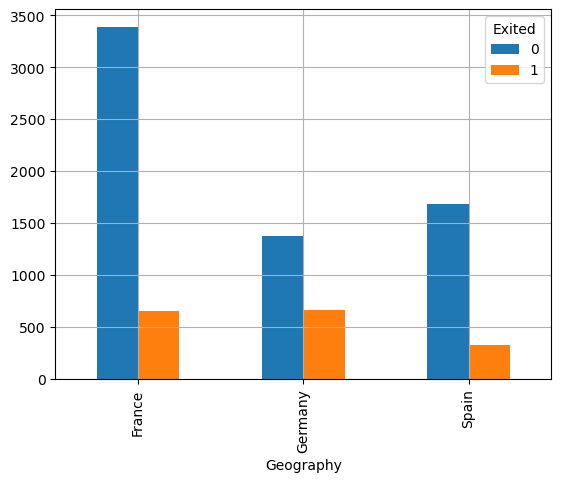

In [43]:
# Churn in each country

X_train.join(y_train).groupby(['Geography', 'Exited']).size().unstack().plot(kind='bar')
plt.grid()

In [44]:
# Proportion of churn by country

h7 = X_train.join(y_train).groupby(['Geography', 'Exited']).size().unstack()

h7.iloc[:, 1] / h7.sum(axis=1)

Geography
France     0.162383
Germany    0.326140
Spain      0.162779
dtype: float64

No significant difference was observed between France and Spain. However, Germany exhibits a higher churn rate.

# 6. Feature Engineering

* Adding a column for expenditure per salary:
* BalancePerSalary = 'Balance' / 'EstimatedSalary'

In [45]:
# Creating classes to equally handle the training, testing, and validation data


class Feature_drop(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.drop(self.cols, axis=1)


class Add_BalancePerSalary(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['BalancePerSalary'] = X['Balance']/X['EstimatedSalary']
        return X

In [46]:
# Pipeline creation and transformation

fd = Feature_drop(['RowNumber', 'CustomerId', 'Surname']) 

ohe = OneHotEncoder(drop='first', sparse_output=False) 

ohe_ct = ColumnTransformer([('ohe_ct', ohe, ['Geography', 'Gender'])], remainder='passthrough')

standard_scaler = StandardScaler()

pipeline = Pipeline([('drop', fd), ('one_hot', ohe_ct),
                     ('StanderScaler', standard_scaler)])

In [47]:
# Transforming the training data

X_train_tr = pipeline.fit_transform(X_train)


# Transforming the validation data

X_val_tr = pipeline.transform(X_val)

In [48]:
# Checking data separability with t-SNE

tsne = TSNE(n_components=2, random_state=42)

X_reduced = tsne.fit_transform(X_train_tr)

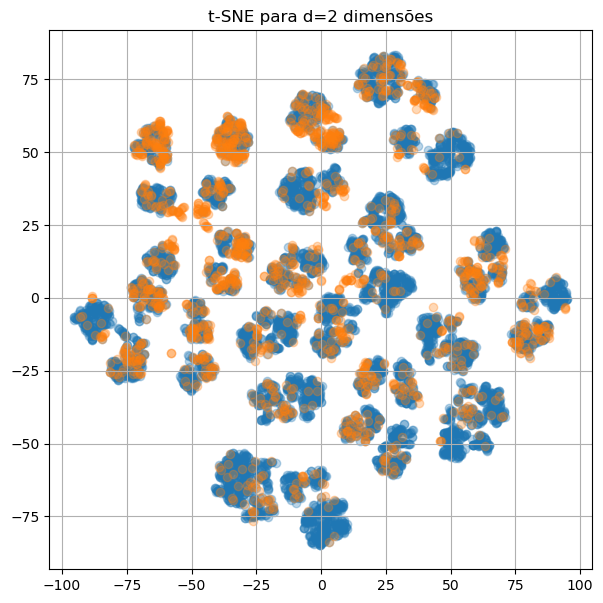

In [49]:
plt.figure(figsize=(7,7))
plt.scatter(X_reduced[y_train == 0, 0], X_reduced[y_train == 0, 1], alpha=0.3)
plt.scatter(X_reduced[y_train == 1, 0], X_reduced[y_train == 1, 1], alpha=0.3)
plt.title('t-SNE for 2-dimensional embedding')
plt.grid()
plt.show()

It is evident from the data above that there is low separability between the classes, as it is challenging to define distinct regions for class 0 and class 1 in two-dimensional space.

# 7. Class Balancing

The class balance has been addressed by applying undersampling to remove overrepresented data and oversampling to augment the undersampled data. This ensures a more balanced representation of the classes.

In [50]:
# Imbalanced proportion

y_train.value_counts(normalize=True)

0    0.796296
1    0.203704
Name: Exited, dtype: float64

In [51]:

# Checking performance with imbalanced data

clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train_tr, y_train)
y_pred = clf.predict(X_val_tr)
y_score = clf.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),2))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       717
           1       0.39      0.66      0.49       183

    accuracy                           0.72       900
   macro avg       0.64      0.70      0.65       900
weighted avg       0.79      0.72      0.74       900

AUC:  0.75


### 7.1 NearMiss (Undersampling)

In [52]:
nm = NearMiss(sampling_strategy=0.5)
X_train_balanced, y_train_balanced = nm.fit_resample(X_train_tr, y_train)

In [53]:
# Checking new proportion with NearMiss

y_train_balanced.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Exited, dtype: float64

In [54]:
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train_balanced, y_train_balanced)
y_pred = clf.predict(X_val_tr)
y_score = clf.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),2))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       717
           1       0.35      0.61      0.44       183

    accuracy                           0.69       900
   macro avg       0.61      0.66      0.61       900
weighted avg       0.77      0.69      0.71       900

AUC:  0.74


### 7.2 SMOTE (Oversampling)

In [55]:
smote = SMOTE(sampling_strategy=0.5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tr, y_train)

clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train_balanced, y_train_balanced)
y_pred = clf.predict(X_val_tr)
y_score = clf.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),2))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80       717
           1       0.38      0.63      0.48       183

    accuracy                           0.72       900
   macro avg       0.63      0.69      0.64       900
weighted avg       0.78      0.72      0.74       900

AUC:  0.75


Despite my efforts to balance the classes, the results did not show significant improvement. Therefore, I will continue with the imbalanced classes. However, I will adjust the class_weight parameter in the models to give higher priority to the undersampled class as my strategy moving forward.

# 8. Feature selection

The SelectKBest method was employed to select the optimal features, using ANOVA as the statistical test. Furthermore, a loop was conducted to determine the ideal number of features (k).

In [56]:
# Dimensionality of X_train_tr

X_train_tr.shape

(8100, 11)

In [57]:
# List with the number of features
k_array = np.arange(1, 12)

# Empty list to store AUC values
auc_array = np.zeros(len(k_array))

for i in range(len(k_array)):
    # Instantiating SelectKBest
    fs = SelectKBest(score_func=f_classif, k=k_array[i])
    # Selected columns from training data
    X_train_selected = fs.fit_transform(X_train_tr, y_train)
    # Selected columns from validation data
    X_val_selected = fs.transform(X_val_tr)

    # Training the model to evaluate AUC
    clf = LogisticRegression(class_weight='balanced')
    clf.fit(X_train_selected, y_train)
    y_score = clf.predict_proba(X_val_selected)[:, 1]

    # AUC of the top K features
    auc_array[i] = roc_auc_score(y_val, y_score)


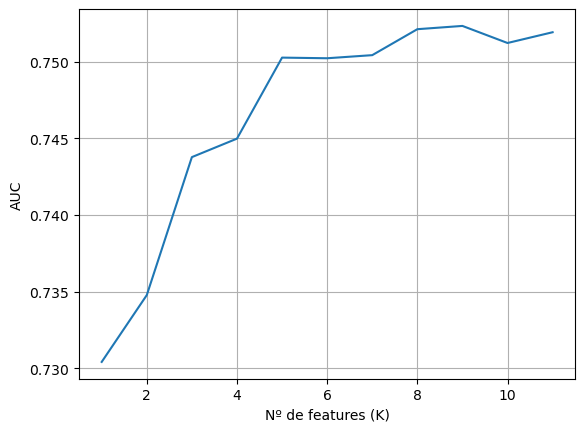

In [58]:
plt.plot(k_array, auc_array)
plt.xlabel('Nº of features (K)')
plt.ylabel('AUC')
plt.grid()
plt.show()

It is observed that as the number of features increases, the AUC also increases. Therefore, I have retained the 11 features for this reason.

# 9. Model training

* Dummy (baseline)
* Logistic Regression
* SVC
* KNN
* Decision Tree
* Random Forest
* LGBM


A dummy model was used for comparative purposes, which makes random predictions.

`Note`: The prioritized metric will be recall, as it aims to capture the majority of churned individuals among all the actual churn cases.

### 9.1 Dummy

In [59]:
dmc = DummyClassifier(strategy='uniform', random_state=42)
dmc.fit(X_train_tr, y_train)
y_pred = dmc.predict(X_val_tr)
y_score = dmc.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       717
           1       0.18      0.45      0.26       183

    accuracy                           0.47       900
   macro avg       0.48      0.46      0.42       900
weighted avg       0.65      0.47      0.52       900

AUC:  0.5


* The precision of the data yielded a value close to the original data ratio, which is expected for a Dummy model.
* The accuracy was approximately 50%.
* As anticipated, the AUC value was 50%.

### 9.2 Logistic Regression

In [60]:
lr = LogisticRegression(C=1.5,class_weight='balanced',random_state=42)
lr.fit(X_train_tr, y_train)
y_pred = lr.predict(X_val_tr)
y_score = lr.predict_proba(X_val_tr)[:,1] # Classe 1

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       717
           1       0.39      0.66      0.49       183

    accuracy                           0.72       900
   macro avg       0.64      0.70      0.65       900
weighted avg       0.79      0.72      0.74       900

AUC:  0.752


Due to its linear and simplistic nature, it can be concluded that the model may not perform well in classifying the data. It is also important to consider the potential low separability of the data, as observed earlier with t-SNE.

### 9.3 SVC

In [61]:
svc = SVC(kernel= 'rbf',class_weight='balanced', probability=True)
svc.fit(X_train_tr, y_train)
y_pred = svc.predict(X_val_tr)
y_score = svc.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC:', np.round(roc_auc_score(y_val, y_score), 3))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       717
           1       0.50      0.67      0.57       183

    accuracy                           0.80       900
   macro avg       0.70      0.75      0.72       900
weighted avg       0.83      0.80      0.81       900

AUC: 0.83


### 9.4 KNN

In [62]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_tr, y_train)
y_pred = knn.predict(X_val_tr)
y_score = knn.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       717
           1       0.67      0.21      0.32       183

    accuracy                           0.82       900
   macro avg       0.75      0.59      0.61       900
weighted avg       0.80      0.82      0.78       900

AUC:  0.764


### 9.5 Decision Tree

In [63]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced',random_state=42)
dt.fit(X_train_tr, y_train)
y_pred = dt.predict(X_val_tr)
y_score = dt.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       717
           1       0.48      0.67      0.56       183

    accuracy                           0.79       900
   macro avg       0.69      0.74      0.71       900
weighted avg       0.82      0.79      0.80       900

AUC:  0.822


### 9.6 Random Forest Classifier

In [64]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=42)
rfc.fit(X_train_tr, y_train)
y_pred = rfc.predict(X_val_tr)
y_score = rfc.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       717
           1       0.76      0.38      0.51       183

    accuracy                           0.85       900
   macro avg       0.81      0.68      0.71       900
weighted avg       0.84      0.85      0.83       900

AUC:  0.819


### 9.7 LGBM

In [65]:
lgbm = LGBMClassifier(n_estimators=200, class_weight='balanced',random_state=42)
lgbm.fit(X_train_tr, y_train)
y_pred = lgbm.predict(X_val_tr)
y_score = lgbm.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

[LightGBM] [Info] Number of positive: 1650, number of negative: 6450
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 8100, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       717
           1       0.54      0.58      0.56       183

    accuracy                           0.81       900
   macro avg       0.72      0.73      0.72       900
weighted avg       0.82      0.81      0.82       900

AUC:  0.816


The SVC model was selected due to its superior AUC performance. However, it is worth noting that there are faster models available, such as LGBM, which could be considered as alternatives.

### 9.8 Tuning the class weights in the SVC

In [66]:
# Adjusting class weights to improve recall

svc = SVC(kernel= 'rbf',class_weight={0:0.15, 1:0.85}, probability=True)
svc.fit(X_train_tr, y_train)
y_pred = svc.predict(X_val_tr)
y_score = svc.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC:', np.round(roc_auc_score(y_val, y_score), 3))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       717
           1       0.41      0.78      0.54       183

    accuracy                           0.73       900
   macro avg       0.67      0.75      0.67       900
weighted avg       0.82      0.73      0.75       900

AUC: 0.829


It is noticed that when recall increases, precision decreases.

### 9.9 Hyperparameter optimization

In [67]:
svc = SVC(probability=True,random_state=42)

param = {'class_weight' : [{0:1-x, 1:x} for x in np.linspace(0.5, 0.9, 10)],
         'C': np.linspace(1.0, 2.0, 5),
         'kernel':['linear', 'poly', 'rbf', 'sigmoid']
        }


svc_opt = RandomizedSearchCV(estimator=svc, param_distributions= param, n_iter=20, scoring='roc_auc',cv=5)
svc_opt.fit(X_train_tr, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=20,
                   param_distributions={'C': array([1.  , 1.25, 1.5 , 1.75, 2.  ]),
                                        'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.4555555555555556,
                                                          1: 0.5444444444444444},
                                                         {0: 0.4111111111111111,
                                                          1: 0.5888888888888889},
                                                         {0: 0.3666666666666667,
                                                          1: 0.6333333333333333},
                                                         {0: 0.3222222222222222,
                                                          1: 0.6777777777777778},
                                                         {0: 0.2777777777777778,
                                                          1: 0.7222222222222222},
                                                         {0: 0.2333333333333334,
                                                          1: 0.7666666666666666},
                                                         {0: 0.18888888888888888,
                                                          1: 0.8111111111111111},
                                                         {0: 0.14444444444444438,
                                                          1: 0.8555555555555556},
                                                         {0: 0.09999999999999998,
                                                          1: 0.9}],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='roc_auc')

In [68]:
# Visualizing the best estimator

final_svc = svc_opt.best_estimator_
final_svc

SVC(C=1.5, class_weight={0: 0.3222222222222222, 1: 0.6777777777777778},
    probability=True, random_state=42)

In [69]:
# Visualizing the best score (AUC)

svc_opt.best_score_

0.8465431054733379

In [70]:
# Validation data performance

y_pred = final_svc.predict(X_val_tr)
y_score = final_svc.predict_proba(X_val_tr)[:,1]

print(classification_report(y_val, y_pred))
print('AUC: ', np.round(roc_auc_score(y_val, y_score),3))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       717
           1       0.62      0.50      0.55       183

    accuracy                           0.84       900
   macro avg       0.75      0.71      0.73       900
weighted avg       0.83      0.84      0.83       900

AUC:  0.835


With that, the evaluation of the model using the validation data has been completed

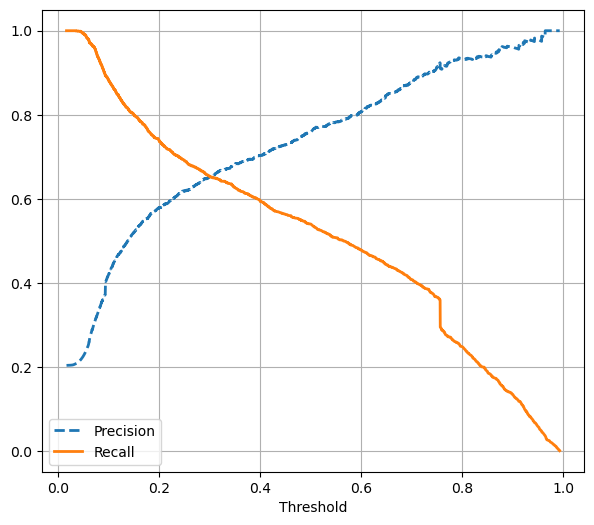

In [71]:
# Precision-recall

y_train_score = final_svc.predict_proba(X_train_tr)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_score[:,1])

plt.figure(figsize=(7,6))
plt.plot(thresholds, precisions[:-1], lw=2, ls='--',label='Precision')
plt.plot(thresholds, recalls[:-1], lw=2, label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.grid()
plt.show()

There's a variation in precision and recall with different cutoff points (thresholds), which signifies the probability of a customer churning. It's evident that as recall increases, precision decreases, and vice versa. This phenomenon is known as the precision-recall tradeoff. It's crucial to highlight that when the recall reaches 100%, the precision is only 20%. This 20% corresponds to the proportion of class 1 data. In such a scenario, the false-positive rate will be elevated. On the contrary, when precision reaches 100%, the count of false negatives rises, and the false positives plummet to zero. This analysis can assist in fine-tuning the recall and precision by selecting the most suitable threshold.

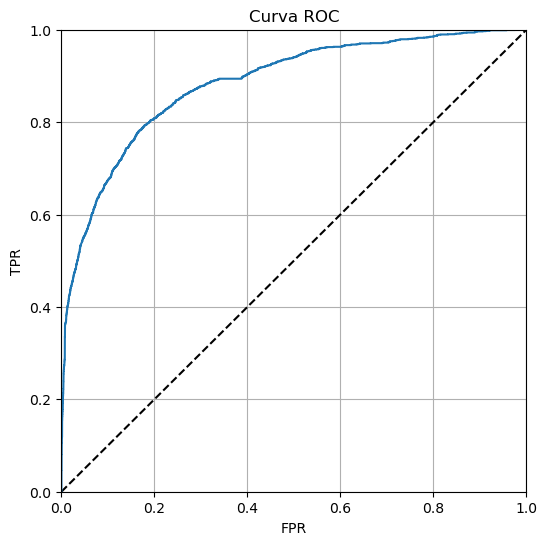

In [72]:
plt.figure(figsize=(6,6))
fpr, tpr, thr = roc_curve(y_train, y_train_score[0:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Curva ROC')
plt.show()

### 9.10 Neural network


In [73]:
# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_tr.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tr, y_train, validation_data=(X_val_tr, y_val), epochs=10, batch_size=32)


Epoch 1/10
254/254 [==============================] - 1s 3ms/step - loss: 0.4846 - accuracy: 0.7952 - val_loss: 0.4286 - val_accuracy: 0.8089
Epoch 2/10
254/254 [==============================] - 1s 2ms/step - loss: 0.3965 - accuracy: 0.8343 - val_loss: 0.3955 - val_accuracy: 0.8244
Epoch 3/10
254/254 [==============================] - 1s 2ms/step - loss: 0.3647 - accuracy: 0.8507 - val_loss: 0.3783 - val_accuracy: 0.8411
Epoch 4/10
254/254 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8559 - val_loss: 0.3747 - val_accuracy: 0.8422
Epoch 5/10
254/254 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8611 - val_loss: 0.3771 - val_accuracy: 0.8389
Epoch 6/10
254/254 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8367
Epoch 7/10
254/254 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8638 - val_loss: 0.3736 - val_accuracy: 0.8411
Epoch 

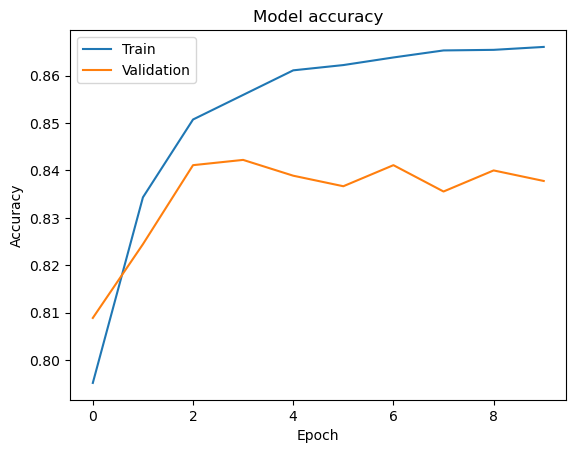

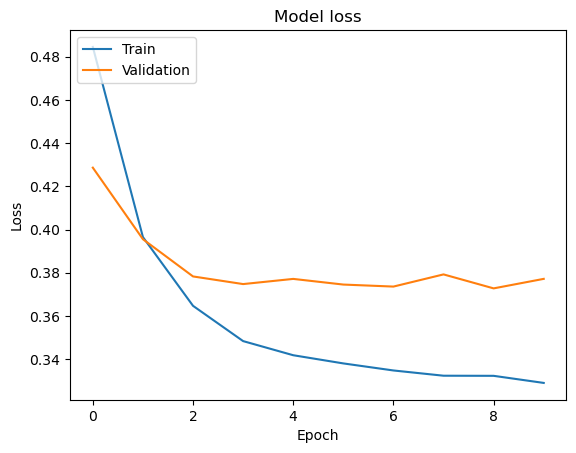

In [74]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [78]:
# Make predictions on the test data
y_pred = model.predict(X_test_tr)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to classes

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 756us/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



The trained neural network achieved an accuracy of approximately 84.22% on the validation data during training, and an accuracy of 86% on the test data, with strong performance in predicting class 0 (precision of 88% and recall of 96%), and slightly weaker performance in predicting class 1 (precision of 74% and recall of 47%).

# 10. Final Evaluation

The model was evaluated with the test data.

In [76]:
# Transformation of test data

X_test_tr = pipeline.transform(X_test)

In [92]:
# Prediction on test data
y_pred = model.predict(X_test_tr)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Converting probabilities into classes

print(classification_report(y_test, y_pred))
print('AUC: ', np.round(roc_auc_score(y_test, y_pred),2))

 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 676us/step
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.74      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000

AUC:  0.72


In [93]:
# Prediction of probabilities on test data
y_score = model.predict(X_test_tr)

# Calculating AUC-ROC using the probabilities
print('AUC: ', np.round(roc_auc_score(y_test, y_score),2))

32/32 [==============================] - 0s 804us/step
AUC:  0.86


The current threshold is set at 50%, but if there's a need to boost recall, we could consider lowering this value. This would, in turn, reduce precision and result in more false positives. By enhancing recall, the company might inadvertently contact customers not currently at risk of churn. However, this would also elevate the chances of pinpointing customers who are genuinely at risk. Given that the potential downside is relatively minor, it's deemed the preferable metric to prioritize.

### 10.1 Confusion Matrix

<Figure size 800x600 with 0 Axes>

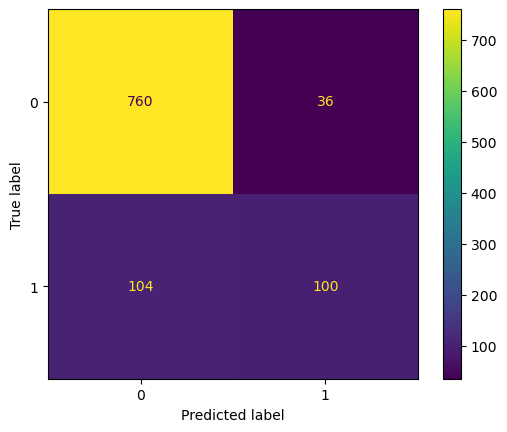

In [95]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (8,6))
ConfusionMatrixDisplay(cm).plot()
plt.show()

The false negatives would not receive the proper attention from the company in terms of churn (74). The true positives (130) would receive the appropriate attention.

### 10.2 Gain Curve and Lift Ratio

In [80]:
# Ranking matrix by score

rank = pd.DataFrame(y_score, y_test).reset_index()
rank.columns = ['alvo', 'score']
rank = rank.sort_values(by='score', ascending=False)
rank.head()

,alvo,score
215,1,0.993565
953,1,0.987543
733,1,0.965112
620,1,0.958052
676,1,0.954631


In [81]:
# Top 20%

decile = 0.2
index_decile = int(decile * len(rank))

top20 = rank.iloc[:index_decile]
print(f"Taxa do alvo (20%): {(top20['alvo'].sum() / rank['alvo'].sum()):.2f}")

Taxa do alvo (20%): 0.61


<Figure size 800x600 with 0 Axes>

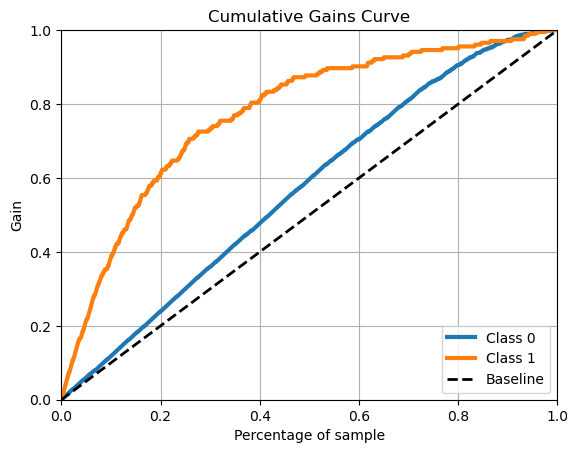

In [82]:
plt.figure(figsize= (8,6))
skplt.metrics.plot_cumulative_gain(y_test, final_svc.predict_proba(X_test_tr))
plt.show()

In the graph above, we can see the total percentages of the ranked data on the X-axis. For example, the target rate in the second decile (20%) was able to capture 60% of the churn cases.

<Figure size 800x600 with 0 Axes>

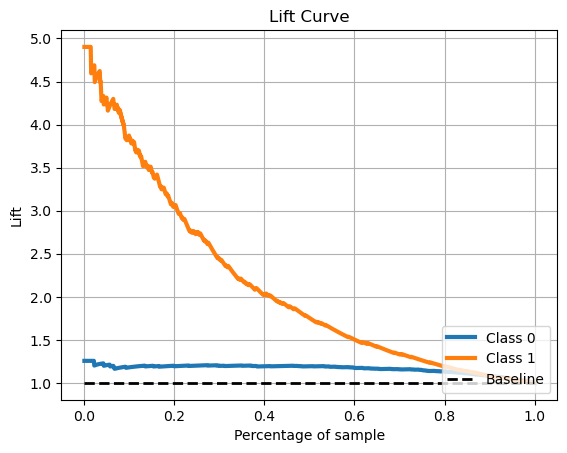

In [83]:
plt.figure(figsize= (8,6))
skplt.metrics.plot_lift_curve(y_test, final_svc.predict_proba(X_test_tr))
plt.show()

The Lift curve allows us to observe the percentiles where the model outperforms the baseline. In this case, at 20% of the dataset, the trained model in the project performed approximately 3 times better than the random (baseline) model.

In [85]:
clientes = X_test.join(pd.Series(y_score, index=y_test.index, name='score')
                      ).sort_values(by='score', ascending=False)

clientes = clientes.drop('RowNumber', axis=1)

clientes.head(20) # Top 20 customers with the highest churn probability

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,score
6172,15656822,Day,568,Germany,Male,43,5,87612.64,4,1,1,107155.40,0.993565
5010,15719508,Davis,575,Germany,Male,49,7,121205.15,4,1,1,168080.53,0.987543
7008,15638610,Kennedy,635,Germany,Female,65,5,117325.54,1,1,0,155799.86,0.965112
880,15585362,Simmons,749,France,Female,60,6,0.00,1,1,0,17978.68,0.958052
7435,15647898,Russell,610,Spain,Female,50,5,130554.51,3,1,0,184758.17,0.954631
4732,15653937,McIntyre,638,Germany,Female,53,1,123916.67,1,1,0,16657.68,0.953772
9255,15622033,Rapuluchukwu,847,Germany,Female,41,3,101543.51,4,1,0,16025.17,0.952905
3130,15813113,Chang,795,Spain,Female,56,5,0.00,1,1,0,35418.69,0.950276
5833,15624519,Calabrese,656,Germany,Female,49,9,97092.87,1,1,0,74771.22,0.940754
1701,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,0.938746
